In [8]:
!pip install deap

In [9]:
import random

from deap import algorithms
from deap import tools
from deap import base
from deap import creator
from deap import benchmarks
from deap import cma

import numpy as np

import matplotlib.pyplot as plt

In [11]:
toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness = creator.FitnessMin)

toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 30)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
  return benchmarks.zdt1(individual)

toolbox.register("evaluate", evaluate)

In [12]:
toolbox.register("crossover", tools.cxSimulatedBinaryBounded, low=0.0, up=1.0, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.0, up=1.0, eta=20.0, indpb=1.0/30)
toolbox.register("select", tools.selNSGA2)
toolbox.register("select_crowd", tools.selTournamentDCD)


In [13]:
def main():
  n_generation = 1000
  n_pop = 200
  prob_crossover = 0.7
  prob_mutation = 0.2

  records = []

  population = toolbox.population(n=n_pop)

  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)


  invalid_ind = [ind for ind in population if not ind.fitness.valid]
  fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
  for ind, fit in zip(invalid_ind, fitnesses):
      ind.fitness.values = fit


  population = toolbox.select(population, len(population))
  for gen in range(n_generation):
    offspring = [toolbox.clone(ind) for ind in population]

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
      if random.random() < prob_crossover:
        toolbox.crossover(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
      if random.random() < prob_mutation:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    next_population = toolbox.select(population + offspring, len(population))
    population = next_population

    record = stats.compile(population)
    print(record)

    records.append(record)

  avgs = [record['avg'] for record in records]
  stds  = [record['std'] for record in records]
  mins  = [record['min'] for record in records]
  maxs  = [record['max'] for record in records]

  plt.plot(avgs, label='avg')
  plt.plot(stds, label='std')
  plt.plot(mins, label='min')
  plt.plot(maxs, label='max')
  plt.legend()
  plt.show()








{'avg': np.float64(2.121528069306531), 'std': np.float64(1.8113576413750163), 'min': np.float64(0.020978192933228113), 'max': np.float64(6.308260787823785)}
{'avg': np.float64(2.026686186703229), 'std': np.float64(1.7305547204203728), 'min': np.float64(0.020978192933228113), 'max': np.float64(5.23961694316099)}
{'avg': np.float64(1.9325903965077997), 'std': np.float64(1.6124436913715041), 'min': np.float64(0.020978192933228113), 'max': np.float64(5.212069187019547)}
{'avg': np.float64(1.8820074912569973), 'std': np.float64(1.615021563045381), 'min': np.float64(0.020978192933228113), 'max': np.float64(5.0582502837191745)}
{'avg': np.float64(1.8245433658866792), 'std': np.float64(1.5772552067951635), 'min': np.float64(0.019885563838333842), 'max': np.float64(5.0582502837191745)}
{'avg': np.float64(1.8191485305904471), 'std': np.float64(1.6190385814901163), 'min': np.float64(0.019885563838333842), 'max': np.float64(5.054612140746221)}
{'avg': np.float64(1.6979036649234698), 'std': np.floa

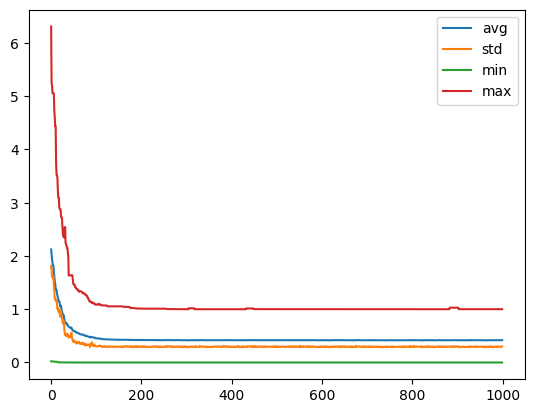

In [14]:
main()